# Imports & Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip, pickle
with gzip.open("mnist_2_vs_9.gz") as f:
    data = pickle.load(f, encoding="bytes")
    Xtrain, Ytrain, Xtest, Ytest, Xdev, Ydev = \
        data[b"Xtrain"], data[b"Ytrain"], data[b"Xtest"], \
        data[b"Ytest"], data[b"Xdev"], data[b"Ydev"]
        
Xtrain = np.append(np.ones((Xtrain.shape[0],1)), Xtrain, axis=1)
Xdev = np.append(np.ones((Xdev.shape[0],1)), Xdev, axis=1)
Xtest = np.append(np.ones((Xtest.shape[0],1)), Xtest, axis=1)

# Functions

In [2]:
def sigmoid(x,w):
    z = np.matmul(x,w)
    return 1.0 / (1 + np.exp(-z))

def get_cost(y, y_hat, w, lamb):
    reg = lamb/(2*len(y)) * sum(w**2)
    return (-1/len(y)) * np.sum(np.dot(y.T,np.log(y_hat)) + np.dot((1 - y).T,np.log(1 - y_hat))) + reg

def update_weights(x, y, y_hat, w, lamb, step):
    dw = (np.dot((y_hat - y),x) + (lamb*w)) / y.shape[0]
    w_new = w - step * dw
    return w_new, dw

def predict(x,w):
    y_pred = sigmoid(x,w)
    y_pred_cls = [1 if i>=0.5 else 0 for i in y_pred]
    return y_pred_cls

def fit(x, y, _lambda, step):
    w = np.zeros(x.shape[1])
    for _ in range(1000):
        y_hat = sigmoid(x, w)
        w_prev = w
        w,dw = update_weights(x, y, y_hat, w_prev, _lambda, step)
        if all(dw < 0.005):
            break
    loss = get_cost(y, y_hat, w_prev, _lambda)    
    return w, loss

def score(y, y_hat):
    return len(y[y==y_hat]) / y.shape[0]

# Find optimal regularization parameter - lambda

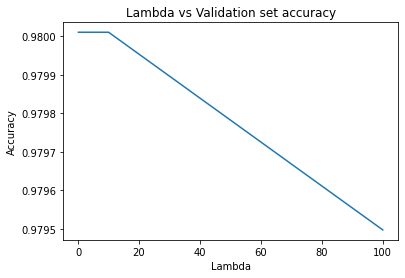

In [3]:
""" 
Runtime of this cell - 11 seconds
finding optimal lambda using lambda vs dev accuracy plt
"""

lambda_vals = [0.1, 1, 10, 100]
acc_for_lambda = []
step = 0.1 # taking step-size as 0.1 for now.

for i in lambda_vals:
    w, loss = fit(Xtrain, Ytrain, i, step)
        
    acc_for_lambda.append(score(Ydev, predict(Xdev, w)))
#print(acc_for_lambda)

# PLOT
plt.plot(lambda_vals,acc_for_lambda)
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Lambda vs Validation set accuracy')
plt.show()

* By looking at the plot, we can clearly **choose lambda value as 10**, since validation-set accuracy decreases after that point.

# Plot Step-size vs Log loss

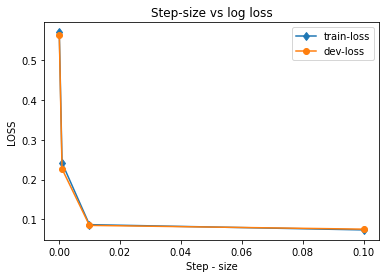

In [4]:
""" Runtime of this cell - 1 min """

step_sizes = [0.0001, 0.001, 0.01, 0.1]
lamb = 10
train_costs, dev_costs = [] ,[]
training_errors, dev_errors = [], []

for step in step_sizes:
    w, train_loss = fit(Xtrain, Ytrain, lamb, step)
    
    y_hat_dev = sigmoid(Xdev, w)
    dev_loss = get_cost(Ydev, y_hat_dev, w, lamb)
    
    train_costs.append(train_loss)
    dev_costs.append(dev_loss)
    
    training_errors.append(1 - score(Ytrain, predict(Xtrain, w)))
    dev_errors.append(1 - score(Ydev, predict(Xdev, w)))
    
    
# PLOT 
plt.plot(step_sizes,train_costs, '-d', label='train-loss')
plt.plot(step_sizes,dev_costs, '-o', label='dev-loss')
plt.legend()
#plt.xlim(0.0000,0.1)
plt.xlabel('Step - size')
plt.ylabel('LOSS')
plt.title('Step-size vs log loss')
plt.show()

# Plot Step-size vs Classification error

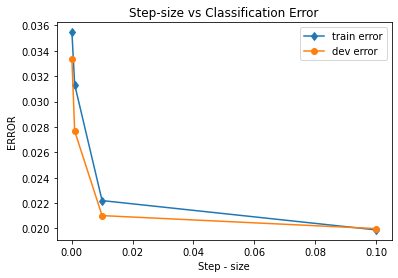

In [5]:
# PLOT 
plt.plot(step_sizes,training_errors, '-d', label='train error')
plt.plot(step_sizes,dev_errors, '-o', label='dev error')
plt.legend()
plt.xlabel('Step - size')
plt.ylabel('ERROR')
plt.title('Step-size vs Classification Error')
plt.show()

* Both the plots show that Step-size/learning rate of 0.1 would be a best fit for this model.

* Therefore, from the above inferences, we will use **lambda=10** and **step-size=0.1** for training our model and predicting the test set.

# Training & predicting Test Data

In [9]:
step = 0.1
_lambda = 10

w, loss = fit(Xtrain, Ytrain, _lambda, step)

train_acc = score(Ytrain, predict(Xtrain, w))
print("<--- Training Data (%) --->")
print("Accuracy = %.4f\nTraining error = %.4f"%(train_acc,(1-train_acc)))

test_acc = score(Ytest, predict(Xtest,w))
print("\n<--- Test Data (%) --->")
print("Accuracy = %.4f\nTest error = %.4f"%(test_acc,(1-test_acc)))

<--- Training Data (%) --->
Accuracy = 0.9801
Training error = 0.0199

<--- Test Data (%) --->
Accuracy = 0.9819
Test error = 0.0181


Finally we have our lowest test error as **0.0181 or 1.81%**.